In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
bank_df = pd.read_csv("banklist.csv", encoding="latin1")

In [3]:
bank_df.head()

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund
0,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.",28-Jul-23,10544
1,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",1-May-23,10543
2,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",12-Mar-23,10540
3,Silicon Valley Bank,Santa Clara,CA,24735,FirstCitizens Bank & Trust Company,10-Mar-23,10539
4,Almena State Bank,Almena,KS,15426,Equity Bank,23-Oct-20,10538


In [5]:
print(bank_df.columns)


Index(['Bank Name ', 'City ', 'State ', 'Cert ', 'Acquiring Institution ',
       'Closing Date ', 'Fund'],
      dtype='object')


In [9]:
# Remova espaços em branco antes e depois dos nomes das colunas
bank_df.columns = bank_df.columns.str.strip()

In [9]:
# Mostrar os tipos de dados nas colunas do csv
bank_df.dtypes

Bank Name                 object
City                      object
State                     object
Cert                       int64
Acquiring Institution     object
Closing Date              object
Fund                       int64
dtype: object

In [11]:
# Analisar se há anomalia ou discrepância entre os dados das colunas
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Bank Name               567 non-null    object
 1   City                    567 non-null    object
 2   State                   567 non-null    object
 3   Cert                    567 non-null    int64 
 4   Acquiring Institution   567 non-null    object
 5   Closing Date            567 non-null    object
 6   Fund                    567 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 31.1+ KB


In [10]:
# Separar os bancos fechados por estados
bank_df.groupby("State").size()

State
AL     7
AR     4
AZ    16
CA    43
CO    10
CT     2
FL    76
GA    93
HI     1
IA     2
ID     2
IL    69
IN     3
KS    12
KY     3
LA     4
MA     1
MD    10
MI    14
MN    23
MO    16
MS     2
NC     7
NE     4
NH     1
NJ     8
NM     3
NV    12
NY     6
OH     9
OK     7
OR     6
PA    10
PR     4
SC    10
SD     1
TN     7
TX    13
UT     8
VA     5
WA    19
WI    11
WV     2
WY     1
dtype: int64

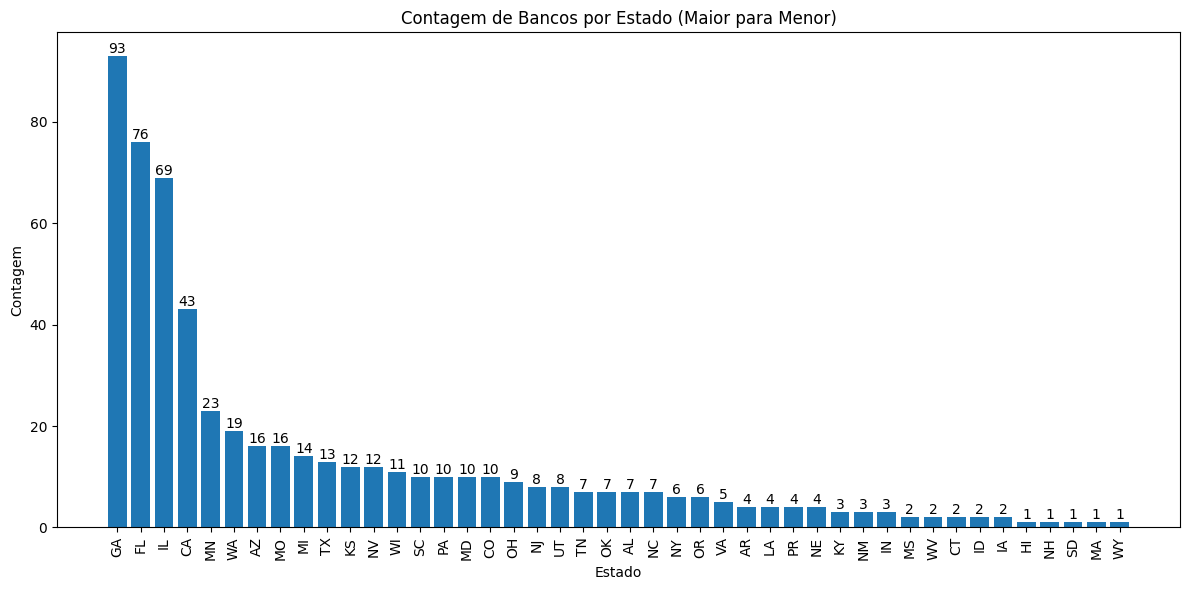

In [11]:

# Armazenado o resultado em uma variável chamada 'state_counts'
state_counts = bank_df.groupby("State").size()

# Classificar os dados em ordem decrescente
state_counts = state_counts.sort_values(ascending=False)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))  # Tamanho da figura (opcional)
plt.bar(state_counts.index, state_counts.values)

# Adicionar números acima de cada barra
for i, count in enumerate(state_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Configurar rótulos e título
plt.xlabel("Estado")
plt.ylabel("Contagem")
plt.title("Contagem de Bancos por Estado (Maior para Menor)")

# Mostrar o gráfico
plt.xticks(rotation=90)  # Rotacionar rótulos do eixo x (opcional)
plt.tight_layout()  # Melhora a formatação
plt.show()


In [12]:
closing_date = bank_df['Closing Date'] = pd.to_datetime(bank_df['Closing Date'])


C:\Users\tiago\AppData\Local\Temp\ipykernel_6372\2487653717.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  closing_date = bank_df['Closing Date'] = pd.to_datetime(bank_df['Closing Date'])


In [13]:
print(closing_date)

0     2023-07-28
1     2023-05-01
2     2023-03-12
3     2023-03-10
4     2020-10-23
         ...    
562   2001-07-27
563   2001-05-03
564   2001-02-02
565   2000-12-14
566   2000-10-13
Name: Closing Date, Length: 567, dtype: datetime64[ns]


In [14]:
bank_df['YearMonth'] = bank_df['Closing Date'].dt.to_period('M')


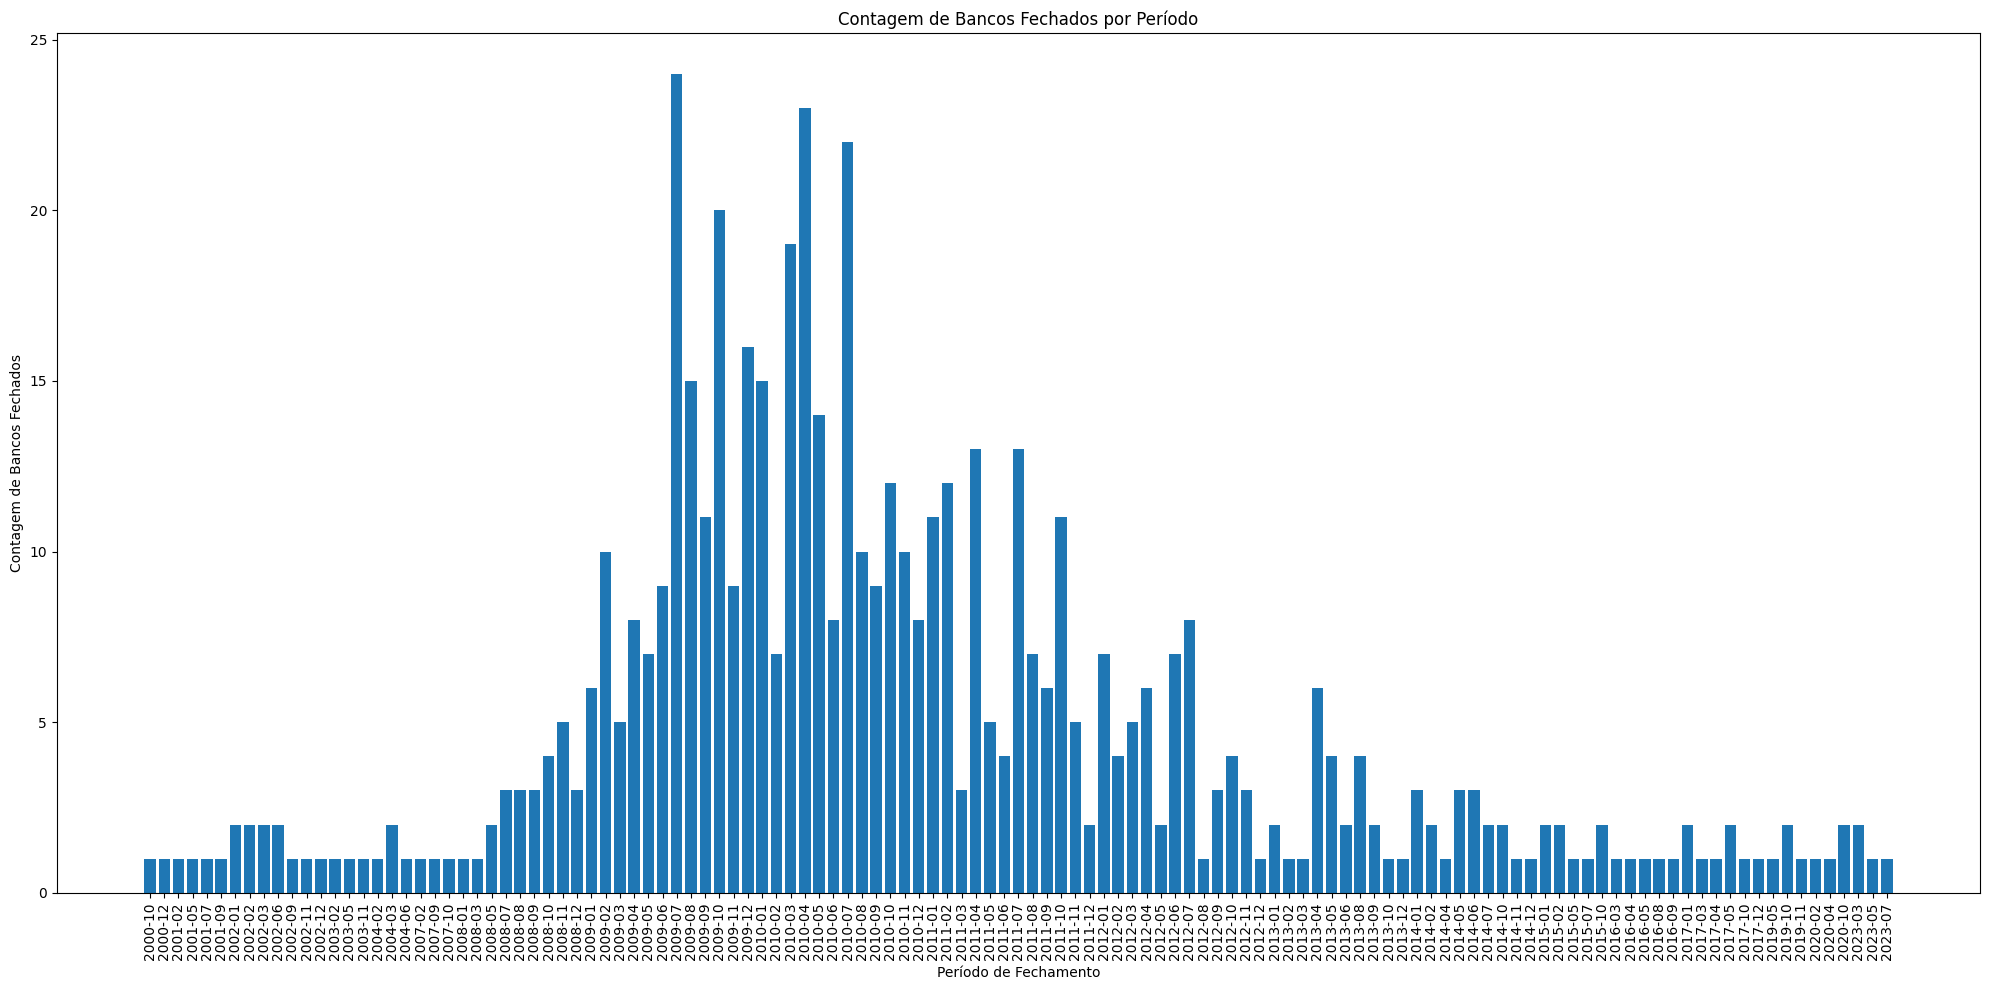

In [15]:
# Agrupar e contar bancos por período
closing_counts = bank_df.groupby('YearMonth').size().reset_index(name='Count')

# Converter os períodos em strings
closing_counts['YearMonth'] = closing_counts['YearMonth'].dt.strftime('%Y-%m')

# Criar um gráfico de barras
plt.figure(figsize=(20, 10))
plt.bar(closing_counts['YearMonth'], closing_counts['Count'])

# Configurar rótulos e título
plt.xlabel("Período de Fechamento")
plt.ylabel("Contagem de Bancos Fechados")
plt.title("Contagem de Bancos Fechados por Período")

# Mostrar o gráfico
plt.xticks(rotation=90)  # Rotacionar rótulos do eixo x (opcional)
plt.tight_layout()  # Melhora a formatação
plt.show()


In [16]:
bank_df['CA'] = bank_df['State'].str.extract(r'(\bCA\b)')
grouped_ca = bank_df.groupby(['State', 'CA']).size()
print (grouped_ca)

State  CA
CA     CA    43
dtype: int64


In [17]:
grouped_by_ca = bank_df.groupby("CA")
grouped_by_ca.head()

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund,YearMonth,CA
1,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",2023-05-01,10543,2023-05,CA
3,Silicon Valley Bank,Santa Clara,CA,24735,FirstCitizens Bank & Trust Company,2023-03-10,10539,2023-03,CA
34,"Frontier Bank, FSB D/B/A El Paseo Bank",Palm Desert,CA,34738,"Bank of Southern California, N.A.",2014-11-07,10508,2014-11,CA
104,Palm Desert National Bank,Palm Desert,CA,23632,Pacific Premier Bank,2012-04-27,10437,2012-04,CA
145,Citizens Bank of Northern California,Nevada City,CA,33983,Tri Counties Bank,2011-09-23,10397,2011-09,CA
